In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [471]:
data, target = load_iris(return_X_y=True, as_frame=True)
target.replace(2, 1, inplace=True)

training_data = data[0:125]
training_target = target[0:125]
testing_data = data[125:len(data)]
testing_target = target[125:len(data)]

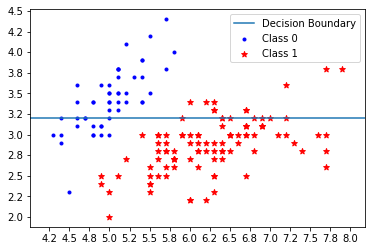

In [472]:
figure, axes = plt.subplots()
axes.set_xticks(np.arange(0, len(data), 0.25), minor=False)
axes.set_yticks(np.arange(0, len(data), 0.25), minor=False)

merged = pd.merge(data, target.to_frame(), left_index=True, right_index=True) # Merge data and target values

data_1 = merged.loc[merged["target"] == 0] # Separate samples with target class of 0
 # Get first and second features
data_1_feature_1 = data_1.iloc[:,0]
data_1_feature_2 = data_1.iloc[:,1]
data_2 = merged.loc[merged["target"] == 1] # Separate samples with target class of 1
 # Get first and second features
data_2_feature_1 = data_2.iloc[:,0]
data_2_feature_2 = data_2.iloc[:,1]

axes.scatter(data_1_feature_1, data_1_feature_2, color="blue", marker=".", label="Class 0")
axes.scatter(data_2_feature_1, data_2_feature_2, color="red", marker="*", label="Class 1")

axes.axline((4.2, 3.2), (8.0, 3.2), label="Decision Boundary")

axes.legend()

In [473]:
svm_polynomial = SVC(kernel="poly")
svm_polynomial.fit(training_data, training_target)

SVC(kernel='poly')

In [474]:
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(training_data, training_target)

SVC()

In [475]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(training_data, training_target)

SVC(kernel='linear')

In [476]:
w1 = svm_linear.coef_[0, 0]
w2 = svm_linear.coef_[0, 1]
b = svm_linear.intercept_[0]
print(f"""Weight 1: {w1} 
Weight 2: {w2}
Bias-term: {b}
""")

print(f"""Equation of the decision boundary:  
{w1} * x1 + {w2} * x2 + ({b})""") 

Weight 1: 0.046258538085542256 
Weight 2: -0.5211827995531007
Bias-term: -1.4528444969775751

Equation of the decision boundary:  
0.046258538085542256 * x1 + -0.5211827995531007 * x2 + (-1.4528444969775751)


In [477]:
svm_polynomial_accuracy = svm_polynomial.score(data, target)
svm_rbf_accuracy = svm_rbf.score(data, target)
svm_linear_accuracy = svm_linear.score(data, target)
print(f"""Polynomial SVM accuracy: {svm_polynomial_accuracy}
RBF SVM accuracy: {svm_rbf_accuracy}
Linear SVM accuracy: {svm_linear_accuracy}""")

Polynomial SVM accuracy: 1.0
RBF SVM accuracy: 1.0
Linear SVM accuracy: 1.0


In [478]:
print(f"""   Confusion Matrix Format
True Positive  | False Positive
False Negative | True Negative""")

   Confusion Matrix Format
True Positive  | False Positive
False Negative | True Negative


In [479]:
prediction = svm_polynomial.predict(testing_data)
conf_matrix = confusion_matrix(testing_target, prediction)
print(conf_matrix)

[[25]]


In [480]:
prediction = svm_rbf.predict(testing_data)
conf_matrix = confusion_matrix(testing_target, prediction)
print(conf_matrix)

[[25]]


In [481]:
prediction = svm_linear.predict(testing_data)
conf_matrix = confusion_matrix(testing_target, prediction)
print(conf_matrix)

[[25]]
